<a href="https://colab.research.google.com/github/Gustavo-Ros/Simulacion-1/blob/main/Montecarlo_Acierto_Error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np                        #Se cargan las librerías
import random as rnd
import matplotlib.pyplot as plt

In [38]:
def grafica (u1,u2,muestra):              #Esta función grafica la corrdenada en el plano
  if muestra==1:
    plt.scatter(u1,u2,color="red")        #Grafica un punto rojo si está dentro del círculo
  else:
    plt.scatter(u1,u2,color="blue")       #Grafica un punto rojo si está dentro del círculo
  return

In [32]:
def muestra(c):                          #Esta función devuelve 1 si la coordenada está dentro del cuarto de círculo y 0 si no.
  n=0
  u1=rnd.random()                        #Coordenada del eje X
  u2=rnd.random()                        #Coordenada del eje Y
  if u2 <= np.sqrt(np.arctan(u1)):       #Condición de la muestra
        n+=1                             #Número de éxito +1
  grafica(u1,u2,n)
  return n

In [36]:
def muestra_sim(c):                          #Esta función devuelve 1 si la coordenada está dentro del cuarto de círculo y 0 si no.
  n=0
  u1=rnd.random()                        #Coordenada del eje X
  u2=rnd.random()                        #Coordenada del eje Y
  if u2 <= np.sqrt(np.arctan(u1)):       #Condición de la muestra
        n+=1                             #Número de éxito +1

  return n

In [39]:
def prob_iter(N):
  prob=[]
  iter=0                                    #No. de itercaiones
  for i in range(N):
    iter+=muestra_sim(np.sqrt(np.arctan(1)))
    prob.append(iter/(i+1))                #Guarda en una lista la probabilidad
  return np.mean(prob)

In [40]:
def prob_iter_graf(N):                           #Grafica solo 1 experimento de Montecarlo
  prob=[]
  iter=0                                         #No. de itercaiones
  X=np.linspace(0,1,100)
  plt.plot(X,np.sqrt(np.arctan(X)))              #Grafica el cuarto de círculo
  for i in range(N):
    iter+=muestra(np.sqrt(np.arctan(1)))
    prob.append(iter/(i+1))                      #Guarda en una lista la probabilidad
  print(np.sqrt(np.arctan(1))*iter/N)
  return prob

0.567185232289765


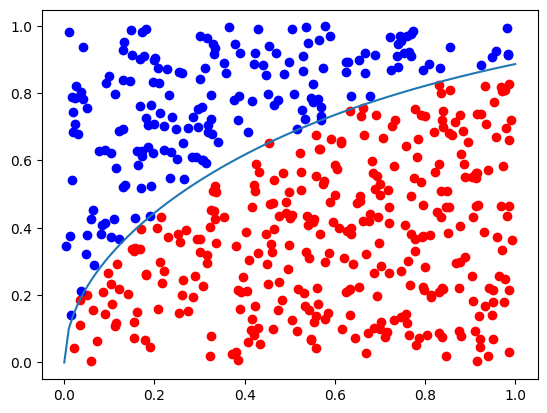

In [41]:
exp=prob_iter_graf(500)


In [42]:
def simulacion(M):          #Esta función es para realizar la simulación mediante varias corridas del experimento
  r=[]
  for i in range(M):
    R=prob_iter(50)        #Si la muestra en el experimento es chica, el número de corridas puede ser alto y viceversa
    r.append(R)
  return r

(array([ 4.,  2.,  3.,  4.,  5.,  5., 14., 12., 15., 22., 20., 35., 36.,
        40., 40., 39., 39., 42., 63., 60., 57., 66., 56., 58., 31., 49.,
        37., 36., 18., 25., 21., 16., 10.,  5.,  7.,  2.,  3.,  1.,  0.,
         2.]),
 array([0.3648371 , 0.37842154, 0.39200599, 0.40559043, 0.41917488,
        0.43275932, 0.44634377, 0.45992821, 0.47351266, 0.48709711,
        0.50068155, 0.514266  , 0.52785044, 0.54143489, 0.55501933,
        0.56860378, 0.58218822, 0.59577267, 0.60935712, 0.62294156,
        0.63652601, 0.65011045, 0.6636949 , 0.67727934, 0.69086379,
        0.70444824, 0.71803268, 0.73161713, 0.74520157, 0.75878602,
        0.77237046, 0.78595491, 0.79953935, 0.8131238 , 0.82670825,
        0.84029269, 0.85387714, 0.86746158, 0.88104603, 0.89463047,
        0.90821492]),
 <BarContainer object of 40 artists>)

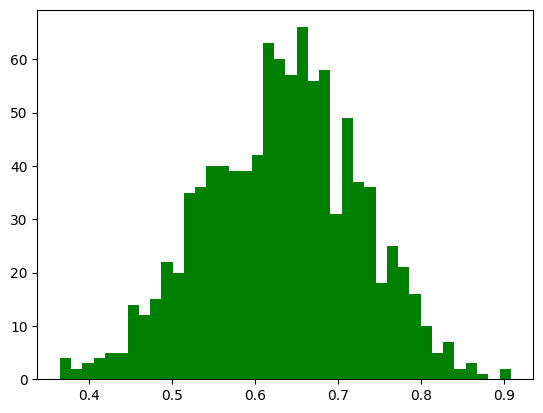

In [43]:
S=simulacion(1000)         #Se simula el experimetno mediante n corridas
plt.hist(S,bins=40,color="green")    #Grafica el histograma de las probabilidades calculas

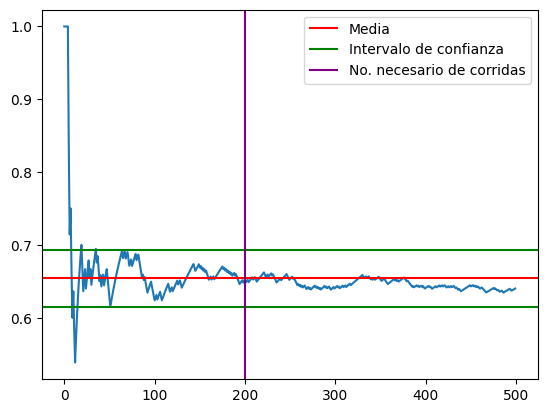

In [44]:
media=np.mean(exp)                                                     #Calcula la media de las probabilidades guardadas en la lista
var=np.std(exp)                                                        #Calcula la varianza de las probabilidades guardadas en la lista
plt.plot(exp)                                                          #Grafica las probabilidades gurdadas, se puede apreciar el estado transitorio y el estable
plt.axhline(media, color="red", label="Media")                         #Grafica la media calculada
plt.axhline(media+var,color="green", label="Intervalo de confianza")
plt.axhline( media-var, color="green")                                  #Crea un intervalo de confianza utilizando la media y varianza
plt.axvline(200, color="purple", label="No. necesario de corridas")     #A partir de 500 vueltas, la probabilidad comienza a estabilizarse
plt.legend()